In [29]:
# # 필요한 패키지 import 하기
# import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
# import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
# import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
# import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
# import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

In [30]:
# my_image_path = 'Image/my_image.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
# img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
# img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
# plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
# plt.show() # 이미지를 출력해준다. (실제 출력)

In [31]:
# img_rotate = cv2.rotate(img_bgr.copy(), cv2.ROTATE_90_CLOCKWISE)
# img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rotate)
# plt.show() 

In [32]:
# # detector 선언
# detector_hog = dlib.get_frontal_face_detector()

# img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
# dlib_tects = detector_hog(img_rgb, 1)
# print(dlib_rects)

# for dlib_rect iin dlib_rects:
#     l = dlib_rect.left()
#     t = dlib_rect.top()
#     r = dlib_rect.right()
#     b = dlib_rect.bottom()
    
#     cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

In [33]:
# 필요한 패키지 import 하기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


In [34]:
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# !cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

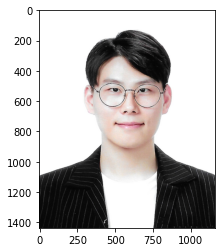

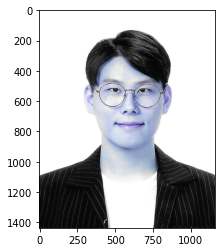

In [35]:
# 본인 이미지의 경로를 설정합니다.
my_image_path = 'Image/my_image.jpg'
# OpenCV로 이미지를 읽어옵니다.
img_bgr = cv2.imread(my_image_path)
# 출력용 이미지를 복사합니다.
img_show = img_bgr.copy()
# BGR 이미지를 RGB 이미지로 변환합니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 이미지를 출력합니다.
plt.imshow(img_rgb)
plt.show()
plt.imshow(img_show)
plt.show()


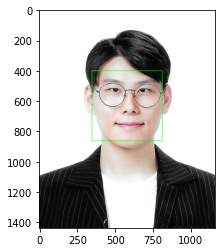

In [36]:
# Dlib의 HOG 기반 얼굴 검출기를 사용하여 얼굴을 검출합니다.
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
def detector_rects(img_rgb, dlib_rects):
    # 검출된 얼굴 영역을 출력합니다.
    for dlib_rect in dlib_rects:   # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽
        
        cv2.rectangle(img_rgb, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    return img_rgb

# img_rgb_rect = detector_rects(img_rgb)
img_show_rect = cv2.cvtColor(detector_rects(img_show, dlib_rects), cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rect)
plt.show()


68


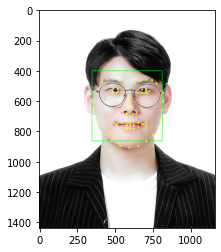

[[(353, 539), (355, 597), (362, 657), (375, 714), (395, 772), (432, 821), (478, 864), (533, 896), (594, 907), (654, 897), (705, 865), (748, 822), (781, 774), (799, 717), (809, 659), (815, 601), (815, 545), (415, 475), (449, 456), (489, 457), (526, 467), (562, 484), (629, 486), (666, 469), (705, 460), (743, 462), (772, 484), (598, 534), (598, 571), (598, 608), (599, 645), (554, 682), (576, 688), (598, 694), (619, 688), (639, 683), (465, 529), (489, 519), (516, 521), (538, 540), (513, 541), (487, 538), (653, 544), (677, 525), (703, 521), (727, 533), (706, 541), (679, 543), (500, 748), (544, 743), (579, 737), (600, 744), (622, 736), (653, 743), (688, 751), (653, 772), (623, 781), (599, 783), (576, 781), (542, 772), (513, 751), (578, 759), (599, 761), (622, 759), (677, 754), (622, 757), (599, 759), (578, 758)]]


In [37]:
# 각 얼굴에 대한 랜드마크를 검출하고, 이미지에 표시합니다.
def landmarks(model_path, dlib_rects, mark = True):
    # 랜드마크 모델을 로드합니다.
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)    
    if mark == True :
        for landmark in list_landmarks:
            for point in landmark:
                cv2.circle(img_show, point, 6, (0, 255, 255), -1)
    return list_landmarks

# list_landmarks = []
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
list_landmarks = landmarks(model_path, dlib_rects, mark = True)
print(len(list_landmarks[0]))

img_show_land = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_land)
plt.show()
print(list_landmarks)

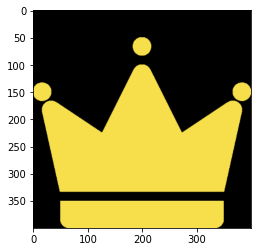

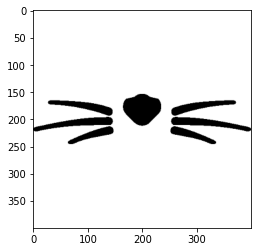

In [38]:
# 스티커 이미지를 불러오고, 크기를 조정합니다.
def sticker_making(path, w, h):
    img_sticker = cv2.imread(path) 
    img_sticker = cv2.resize(img_sticker, (w, h))
    return img_sticker

king_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png' 
king_sticker = sticker_making(king_path, 400, 400)

cat_path = os.getenv('HOME')+'/aiffel/Aiffel_Quest/Exploration6/Image/cat-whiskers.png' 
cat_sticker = sticker_making(cat_path, 400, 400)

king_stiker_rgb = cv2.cvtColor(king_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(king_stiker_rgb)
plt.show()

cat_sticker_rgb = cv2.cvtColor(cat_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(cat_sticker_rgb)
plt.show()

In [40]:
# 스티커를 적용할 위치를 계산합니다.
def landmark(landmark_index, dlib_rects, list_landmarks):
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[landmark_index][0]
        y = landmark[landmark_index][1] # + dlib_rect.height()//2
        w = h = dlib_rect.width()
    return x, y, w, h
    


x, y, w, h = landmark(30, dlib_rects, list_landmarks)
print(f'(x, y) : ({x}, {y})')
print(f'(w, h) : ({w}, {h})')

(x, y) : (599, 645)
(w, h) : (463, 463)


In [41]:
# 스티커 이미지가 이미지 범위를 벗어나지 않도록 조정합니다.
def refined(img_sticker, x,y,w,h):
    refined_x = x - w
    refined_y = y - h
    
    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
        
    # 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
        refined_y = 0
        
    return refined_x, refined_y
refined_x, refined_y = refined(king_sticker, x, y, w//2, 2*h)
print(f'(x, y) : ({refined_x},{refined_y})')
print(king_sticker.shape)

(x, y) : (368,0)
(400, 400, 3)


In [42]:
def sticker_area_f(img_show, img_sticker, refined_x, refined_y, condition_3d = False):
    # 스티커 이미지를 원본 이미지에 적용합니다.
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show의[:,:] 공간을 stiker_area라고 하장
    
    if condition_3d == True:
        B, G, R = cv2.split(img_sticker)
        # # 검정색이 아닌 픽셀 찾기 (B, G, R 중 하나라도 0이 아닌 경우)
        not_black = np.any([B > 0, G > 0, R > 0], axis=0)

        # # 흰색이 아닌 픽셀 찾기 (B, G, R 중 하나라도 255가 아닌 경우)
        not_white = np.any([B == 255, G == 255, R == 255], axis=0)

        # # 검정색이거나 흰색이 아닌 픽셀 조건
        condition = np.logical_and(not_black, not_white)
        # # 'condition' 배열을 3차원으로 확장
        condition_3d = np.stack((condition, condition, condition), axis=-1)

        img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where( condition_3d ,sticker_area,img_sticker).astype(np.uint8)
        
    else :
        img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
            np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
        
    return img_show


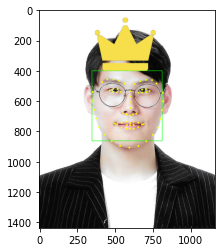

In [43]:
# 최종 결과를 출력합니다.
img_show_fin = sticker_area_f(img_show, king_sticker, refined_x, refined_y)
plt.imshow(cv2.cvtColor(img_show_fin, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
refined_x2, refined_y2 = refined(cat_sticker, x,y, w//2, h//2)
print(f'x2 : {refined_x2}, y2 : {refined_y2}')
print(x, y, w, h) # 새로운 스티커를 부착할 위치 선정하기

x2 : 368, y2 : 414
599 645 463 463


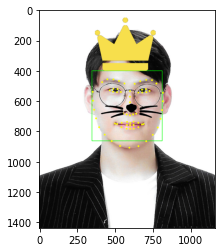

In [45]:
img_show_fin =\
sticker_area_f(
    img_show, 
    cat_sticker, 
    refined_x2+40, 
    refined_y2+50, 
    condition_3d = True
)
plt.imshow(cv2.cvtColor(img_show_fin, cv2.COLOR_BGR2RGB))
plt.show()

In [68]:
# 이미지 갱신
img_bgr = cv2.imread(my_image_path)

# 출력용 이미지를 복사합니다.
img_show = img_bgr.copy()
img_bgr_orig = img_bgr.copy()

# BGR 이미지를 RGB 이미지로 변환합니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)



x : 408, y : 464
599 645 463 463


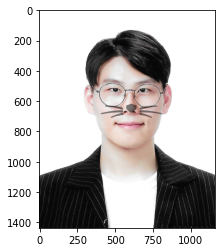

In [47]:
# 반투명 스티커 붙이기!
refined_x, refined_y = refined(cat_sticker, x,y, w//2-40, h//2-50)
print(f'x : {refined_x}, y : {refined_y}')
print(x, y, w, h) # 스티커를 부착할 위치 선정하기

sticker_area = img_bgr[refined_y:refined_y+cat_sticker.shape[0], refined_x:refined_x+cat_sticker.shape[1]]
img_bgr[refined_y:refined_y+cat_sticker.shape[0], refined_x:refined_x+cat_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(cat_sticker==255,sticker_area,cat_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

[[(353, 539), (355, 597), (362, 657), (375, 714), (395, 772), (432, 821), (478, 864), (533, 896), (594, 907), (654, 897), (705, 865), (748, 822), (781, 774), (799, 717), (809, 659), (815, 601), (815, 545), (415, 475), (449, 456), (489, 457), (526, 467), (562, 484), (629, 486), (666, 469), (705, 460), (743, 462), (772, 484), (598, 534), (598, 571), (598, 608), (599, 645), (554, 682), (576, 688), (598, 694), (619, 688), (639, 683), (465, 529), (489, 519), (516, 521), (538, 540), (513, 541), (487, 538), (653, 544), (677, 525), (703, 521), (727, 533), (706, 541), (679, 543), (500, 748), (544, 743), (579, 737), (600, 744), (622, 736), (653, 743), (688, 751), (653, 772), (623, 781), (599, 783), (576, 781), (542, 772), (513, 751), (578, 759), (599, 761), (622, 759), (677, 754), (622, 757), (599, 759), (578, 758)]]


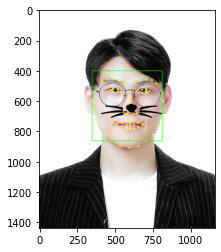

[]


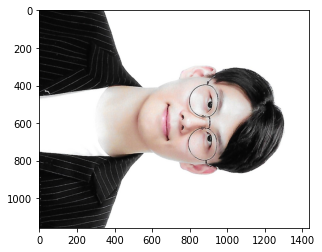

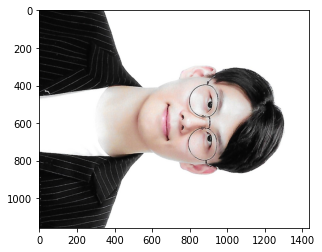

[]


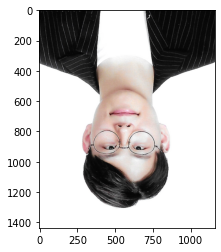

In [65]:
# 회전된 이미지를 생성합니다.
rotated_90 = cv2.rotate(img_bgr_orig, cv2.ROTATE_90_CLOCKWISE)
rotated_180 = cv2.rotate(img_bgr_orig, cv2.ROTATE_180)

model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'


dlib_rects = detector_hog(img_show, 1)
list_landmarks = landmarks(model_path, dlib_rects, mark = True)
print(list_landmarks[:5])
img_show_land = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
img_show_rect = cv2.cvtColor(detector_rects(img_show, dlib_rects), cv2.COLOR_BGR2RGB)
img_show_fin = sticker_area_f(img_show, cat_sticker, refined_x, refined_y, condition_3d = True)
plt.imshow(cv2.cvtColor(img_show_fin, cv2.COLOR_BGR2RGB))
plt.show()


dlib_rects_r90 = detector_hog(rotated_90, 1)
list_landmarks_r90 = landmarks(model_path, dlib_rects_r90, mark = True)
print(list_landmarks_r90[:5])          # 리스트를 확인했으나 랜드 좌표값이 담기지 않았다.
rotated_90_land = cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB)
rotated_90_rect = cv2.cvtColor(detector_rects(rotated_90, dlib_rects_r90), cv2.COLOR_BGR2RGB)
plt.imshow(rotated_90_rect)
plt.show()
# rotated_90_fin = sticker_area_f(rotated_90, cat_sticker, refined_x, refined_y, condition_3d = True)

plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
plt.show()


dlib_rects_r180 = detector_hog(rotated_180, 1)
list_landmarks_r180 = landmarks(model_path, dlib_rects_r180, mark = True)
print(list_landmarks_r180[:5])         # 리스트를 확인했으나 랜드 좌표값이 담기지 않았다.
rotated_180_land = cv2.cvtColor(rotated_180, cv2.COLOR_BGR2RGB)
rotated_180_rect = cv2.cvtColor(detector_rects(rotated_180, dlib_rects_r180), cv2.COLOR_BGR2RGB)
# rotated_180_fin = sticker_area_f(rotated_180_rect, cat_sticker, refined_x, refined_y, condition_3d = True)

plt.imshow(cv2.cvtColor(rotated_180, cv2.COLOR_BGR2RGB))
plt.show()


# plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(rotated_180, cv2.COLOR_BGR2RGB))
# plt.show()


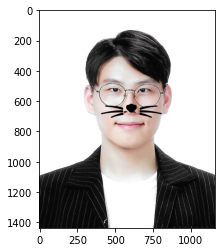

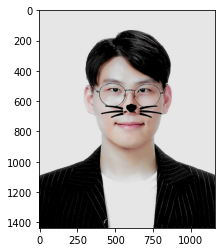

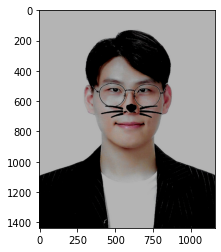

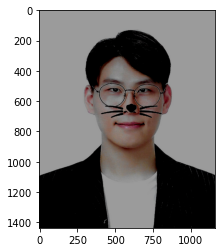

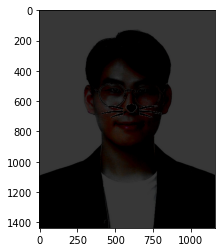

In [67]:
# 이미지 밝기 조절
img_drk_1 = np.ones(img_show.shape, dtype = "uint8") * 25
img_drk_2 = np.ones(img_show.shape, dtype = "uint8") * 75
img_drk_3 = np.ones(img_show.shape, dtype = "uint8") * 100
img_drk_4 = np.ones(img_show.shape, dtype = "uint8") * 200

sub_1 = cv2.subtract(img_show,img_drk_1)
sub_2 = cv2.subtract(img_show,img_drk_2)
sub_3 = cv2.subtract(img_show,img_drk_3)
sub_4 = cv2.subtract(img_show,img_drk_4)

# 이미지를 출력합니다.

img_bgr = sticker_area_f(img_show, cat_sticker, refined_x, refined_y, condition_3d = True)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

sub_1 = sticker_area_f(sub_1, cat_sticker, refined_x, refined_y, condition_3d = True)
plt.imshow(cv2.cvtColor(sub_1, cv2.COLOR_BGR2RGB))
plt.show()

sub_2 = sticker_area_f(sub_2, cat_sticker, refined_x, refined_y, condition_3d = True)
plt.imshow(cv2.cvtColor(sub_2, cv2.COLOR_BGR2RGB))
plt.show()

sub_3 = sticker_area_f(sub_3, cat_sticker, refined_x, refined_y, condition_3d = True)
plt.imshow(cv2.cvtColor(sub_3, cv2.COLOR_BGR2RGB))
plt.show()

sub_4 = sticker_area_f(sub_4, cat_sticker, refined_x, refined_y, condition_3d = True)
plt.imshow(cv2.cvtColor(sub_4, cv2.COLOR_BGR2RGB))
plt.show()

<Face detection rsult : Fail>


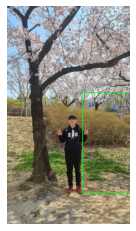

In [69]:
#이미지 경로설정 + 색상조정
my_image2_path = 'Image/my_image2.png'

# OpenCV로 이미지를 읽어옵니다.
img_bgr = cv2.imread(my_image2_path)

# 출력용 이미지를 복사합니다.
img_show = img_bgr.copy()
img_tiny = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# 얼굴찾기
for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_tiny, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_tiny =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
print("<Face detection rsult : Fail>")
plt.axis("off")
plt.imshow(img_tiny)
plt.show()